<a href="https://colab.research.google.com/github/gulmert89/dsBootcamp/blob/master/odev92_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 9.2 - Kümeleme Algoritmaları: Kmeans
## Ödev:
1) Bu ödevin amacı, iris veri kümesine k-ortalama uygulamak ve k değerini değiştirdiğinde ne olacağını görmektir. Varsa, hangi çözümü en iyi olarak görüyorsunuz? Karmaşıklık bu veri kümesinde bir sorun olmaya başlıyor mu? Bulgularınızı mentörle paylaşın. 3'ten fazla kümey içeren bir sonuç bulabileceğinizi aklınızdan çıkarmayın.Bu kümelerden ikisi tek bir çiçek türüyle eşleşirken, diğer ikisi örneğin diğer türlerle eşlenir.


2) Bu ödevde, UC Irvine Machine Learning Repository'de bulunan kalp hastalığı veri setiyle çalışacaksınız.

Veri setini kullanmadan önce bazı ön işlemler yapmanız gerekiyor:

<code># Define the features and the outcome<br>
X = heartdisease_df.iloc[:, :13]<br>
y = heartdisease_df.iloc[:, 13]<br></code>

<code># Replace missing values (marked by ?) with a 0<br>
X = X.replace(to_replace='?', value=0)<br></code>

<code># Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis<br>
y = np.where(y > 0, 0, 1)<br></code>

Burada, X sizin özellikleriniz olacak ve y içinde etiketleri tutuyoruz. Y, 1'e eşitse, o zaman karşılık gelen hastanın kalp hastalığı olduğunu ve y 0'a eşitse, hastanın kalp hastalığı olmadığını gösterir.

Hastaları "kalp hastalığı tanısı" veya "kalp hastalığı tanısı yok" kümelerine doğru şekilde atayan bir k-ortalama çözümü oluşturun. Bu durumda, aslında iki olan verideki doğru küme sayısını biliyoruz. Ancak burada, k-ortalamanın beklediğimiz şekilde gözlemleri atayıp atamadığını test edeceksiniz. K-ortalama, denetimsiz bir öğrenme algoritması olduğu için, hastaların kalp hastalığı olup olmadığına karşı kör olacaktır.d

---
## Soru 1

In [12]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style("whitegrid")
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn import datasets

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [62]:
# preprocessing
iris = datasets.load_iris()
x1 = iris.data
y1 = iris.target

scaler = StandardScaler()
x1_std = scaler.fit_transform(x1)

In [63]:
# forming KMeans model with 3 clusters
kmeans_cluster = KMeans(n_clusters=3, random_state=42)
# fit the model
%timeit kmeans_cluster.fit(x1_std)
y1_prediction = kmeans_cluster.predict(x1_std)

10 loops, best of 3: 24 ms per loop


In [ ]:
# dimension reduction
pca1 = PCA(n_components=2).fit_transform(x1_std)

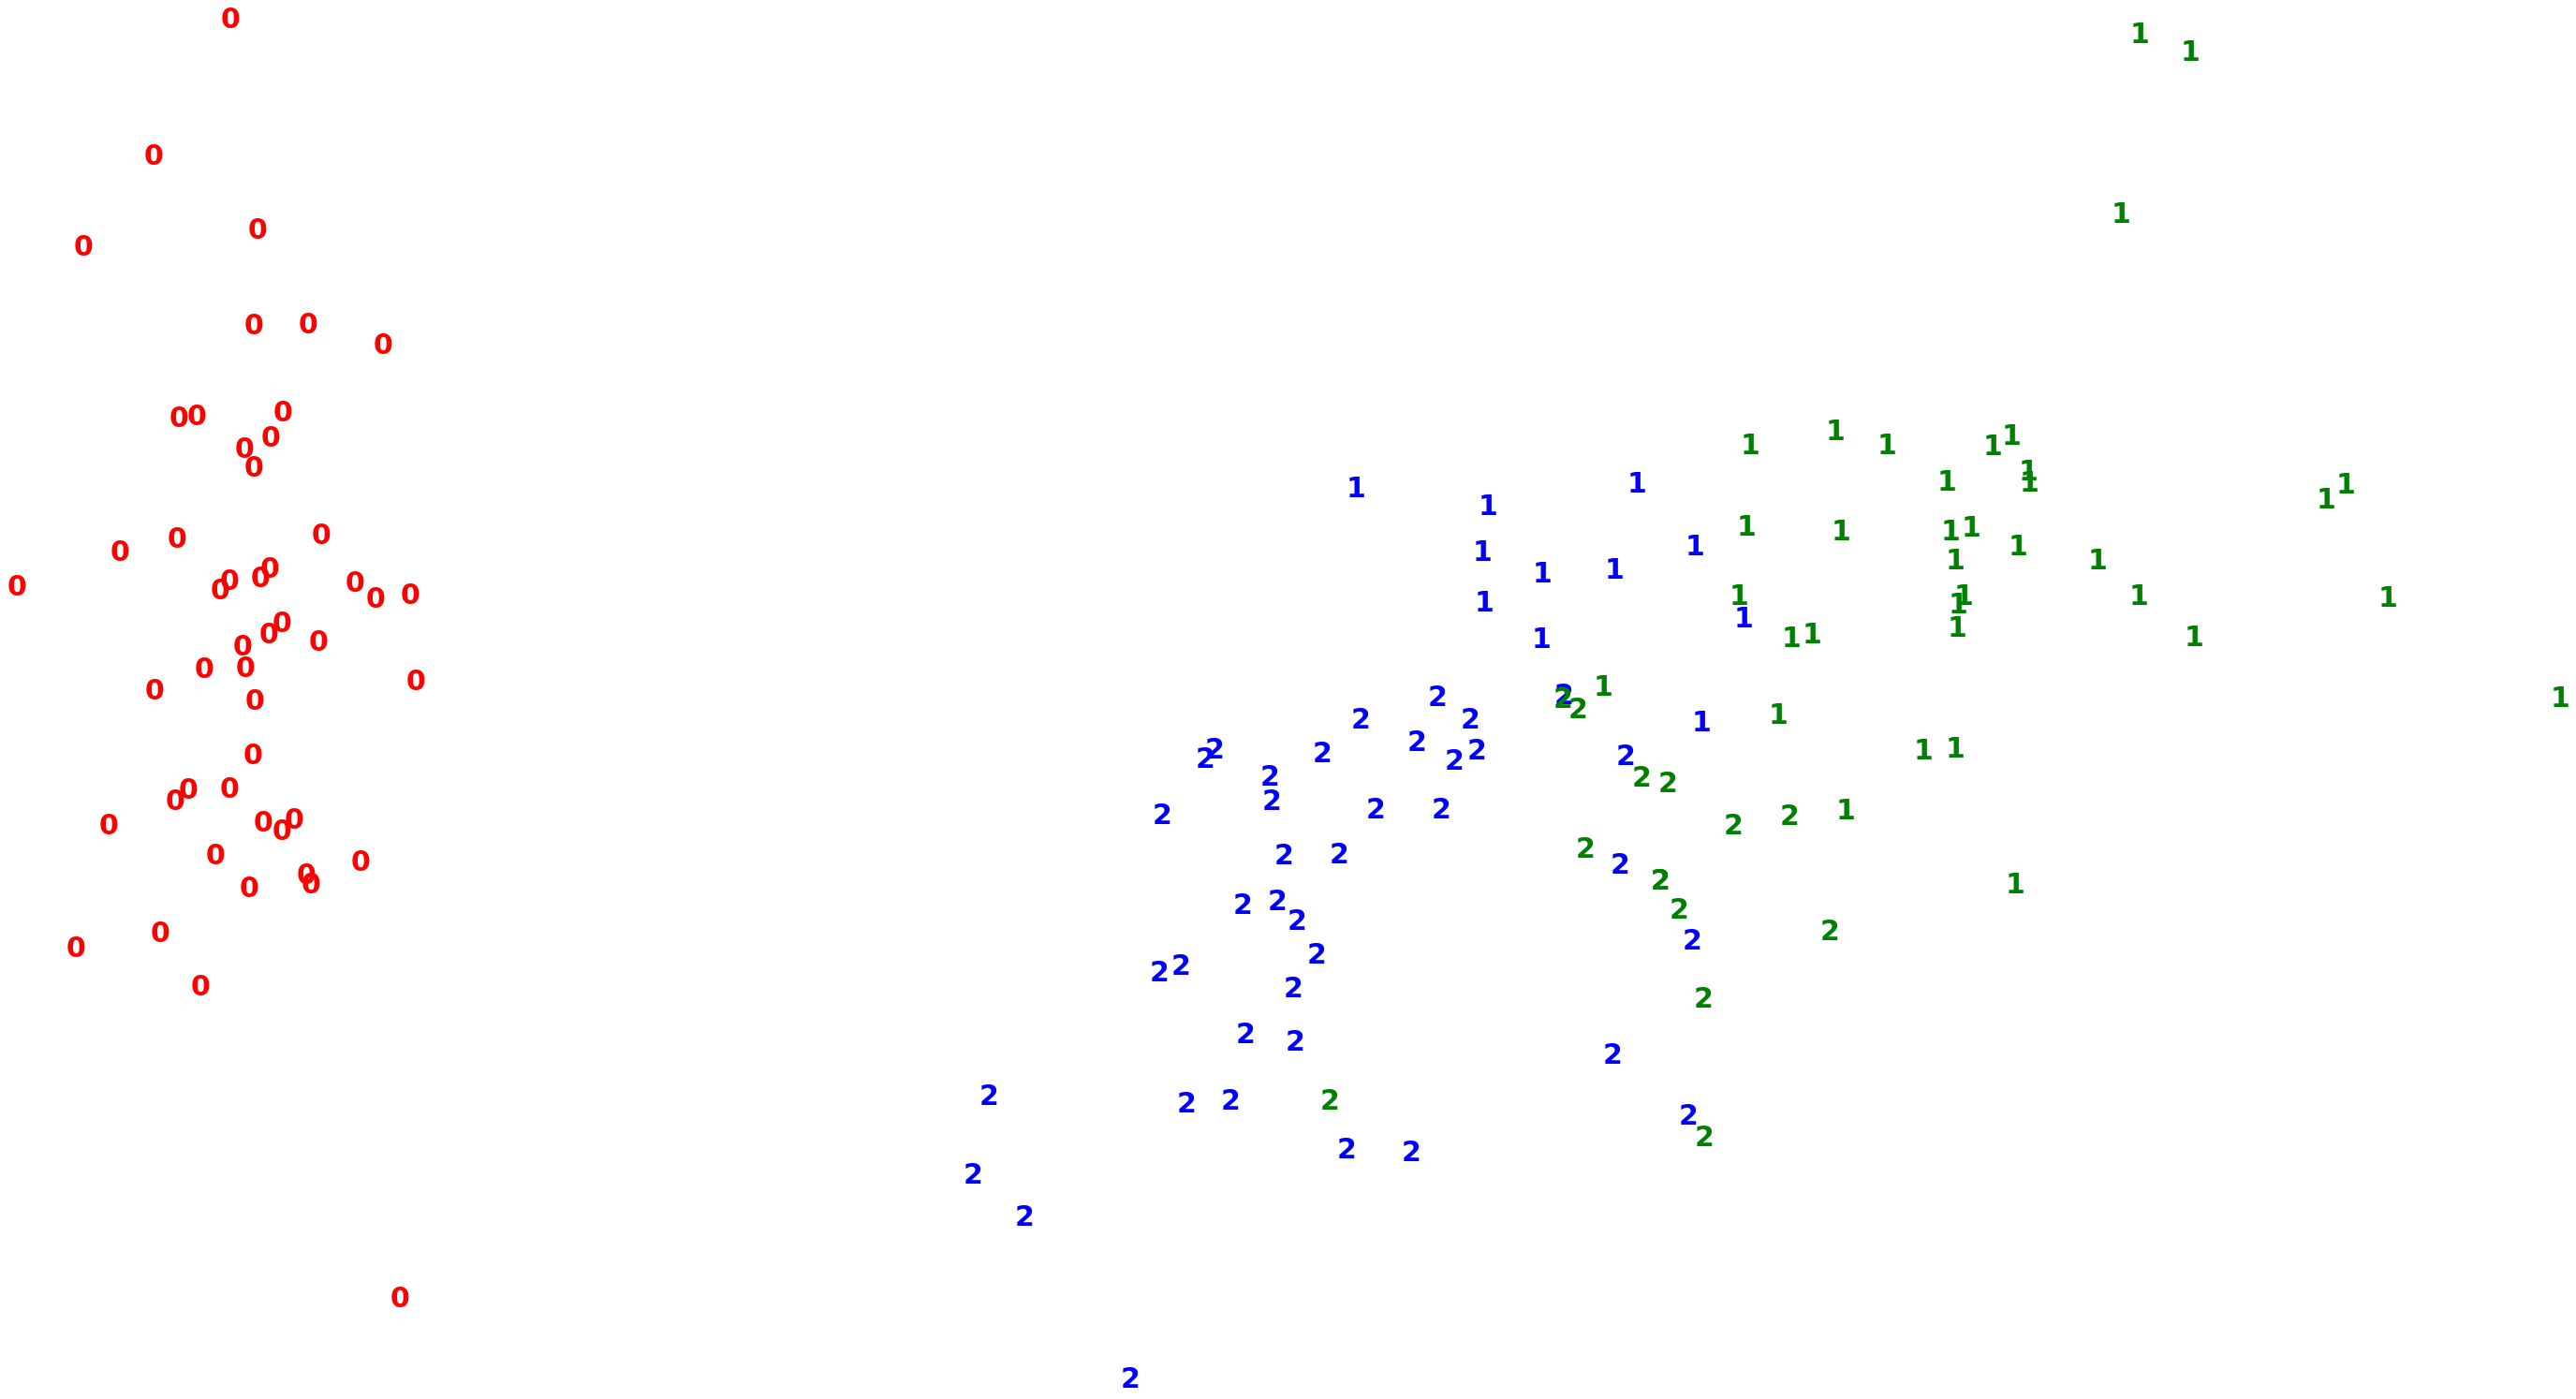

In [87]:
# visualise the output
plt.figure(figsize=(8, 5))
colors = "rbg"
for i in range(pca1.shape[0]):
    plt.text(x=pca1[i, 0], y=pca1[i, 1], s=str(y1_prediction[i]), 
             color=colors[y1[i]], fontdict={"weight":"bold", "size":30})

plt.xticks([])
plt.yticks([])
plt.axis("off")
plt.show()
# colors are true values where numbers reflect predictions

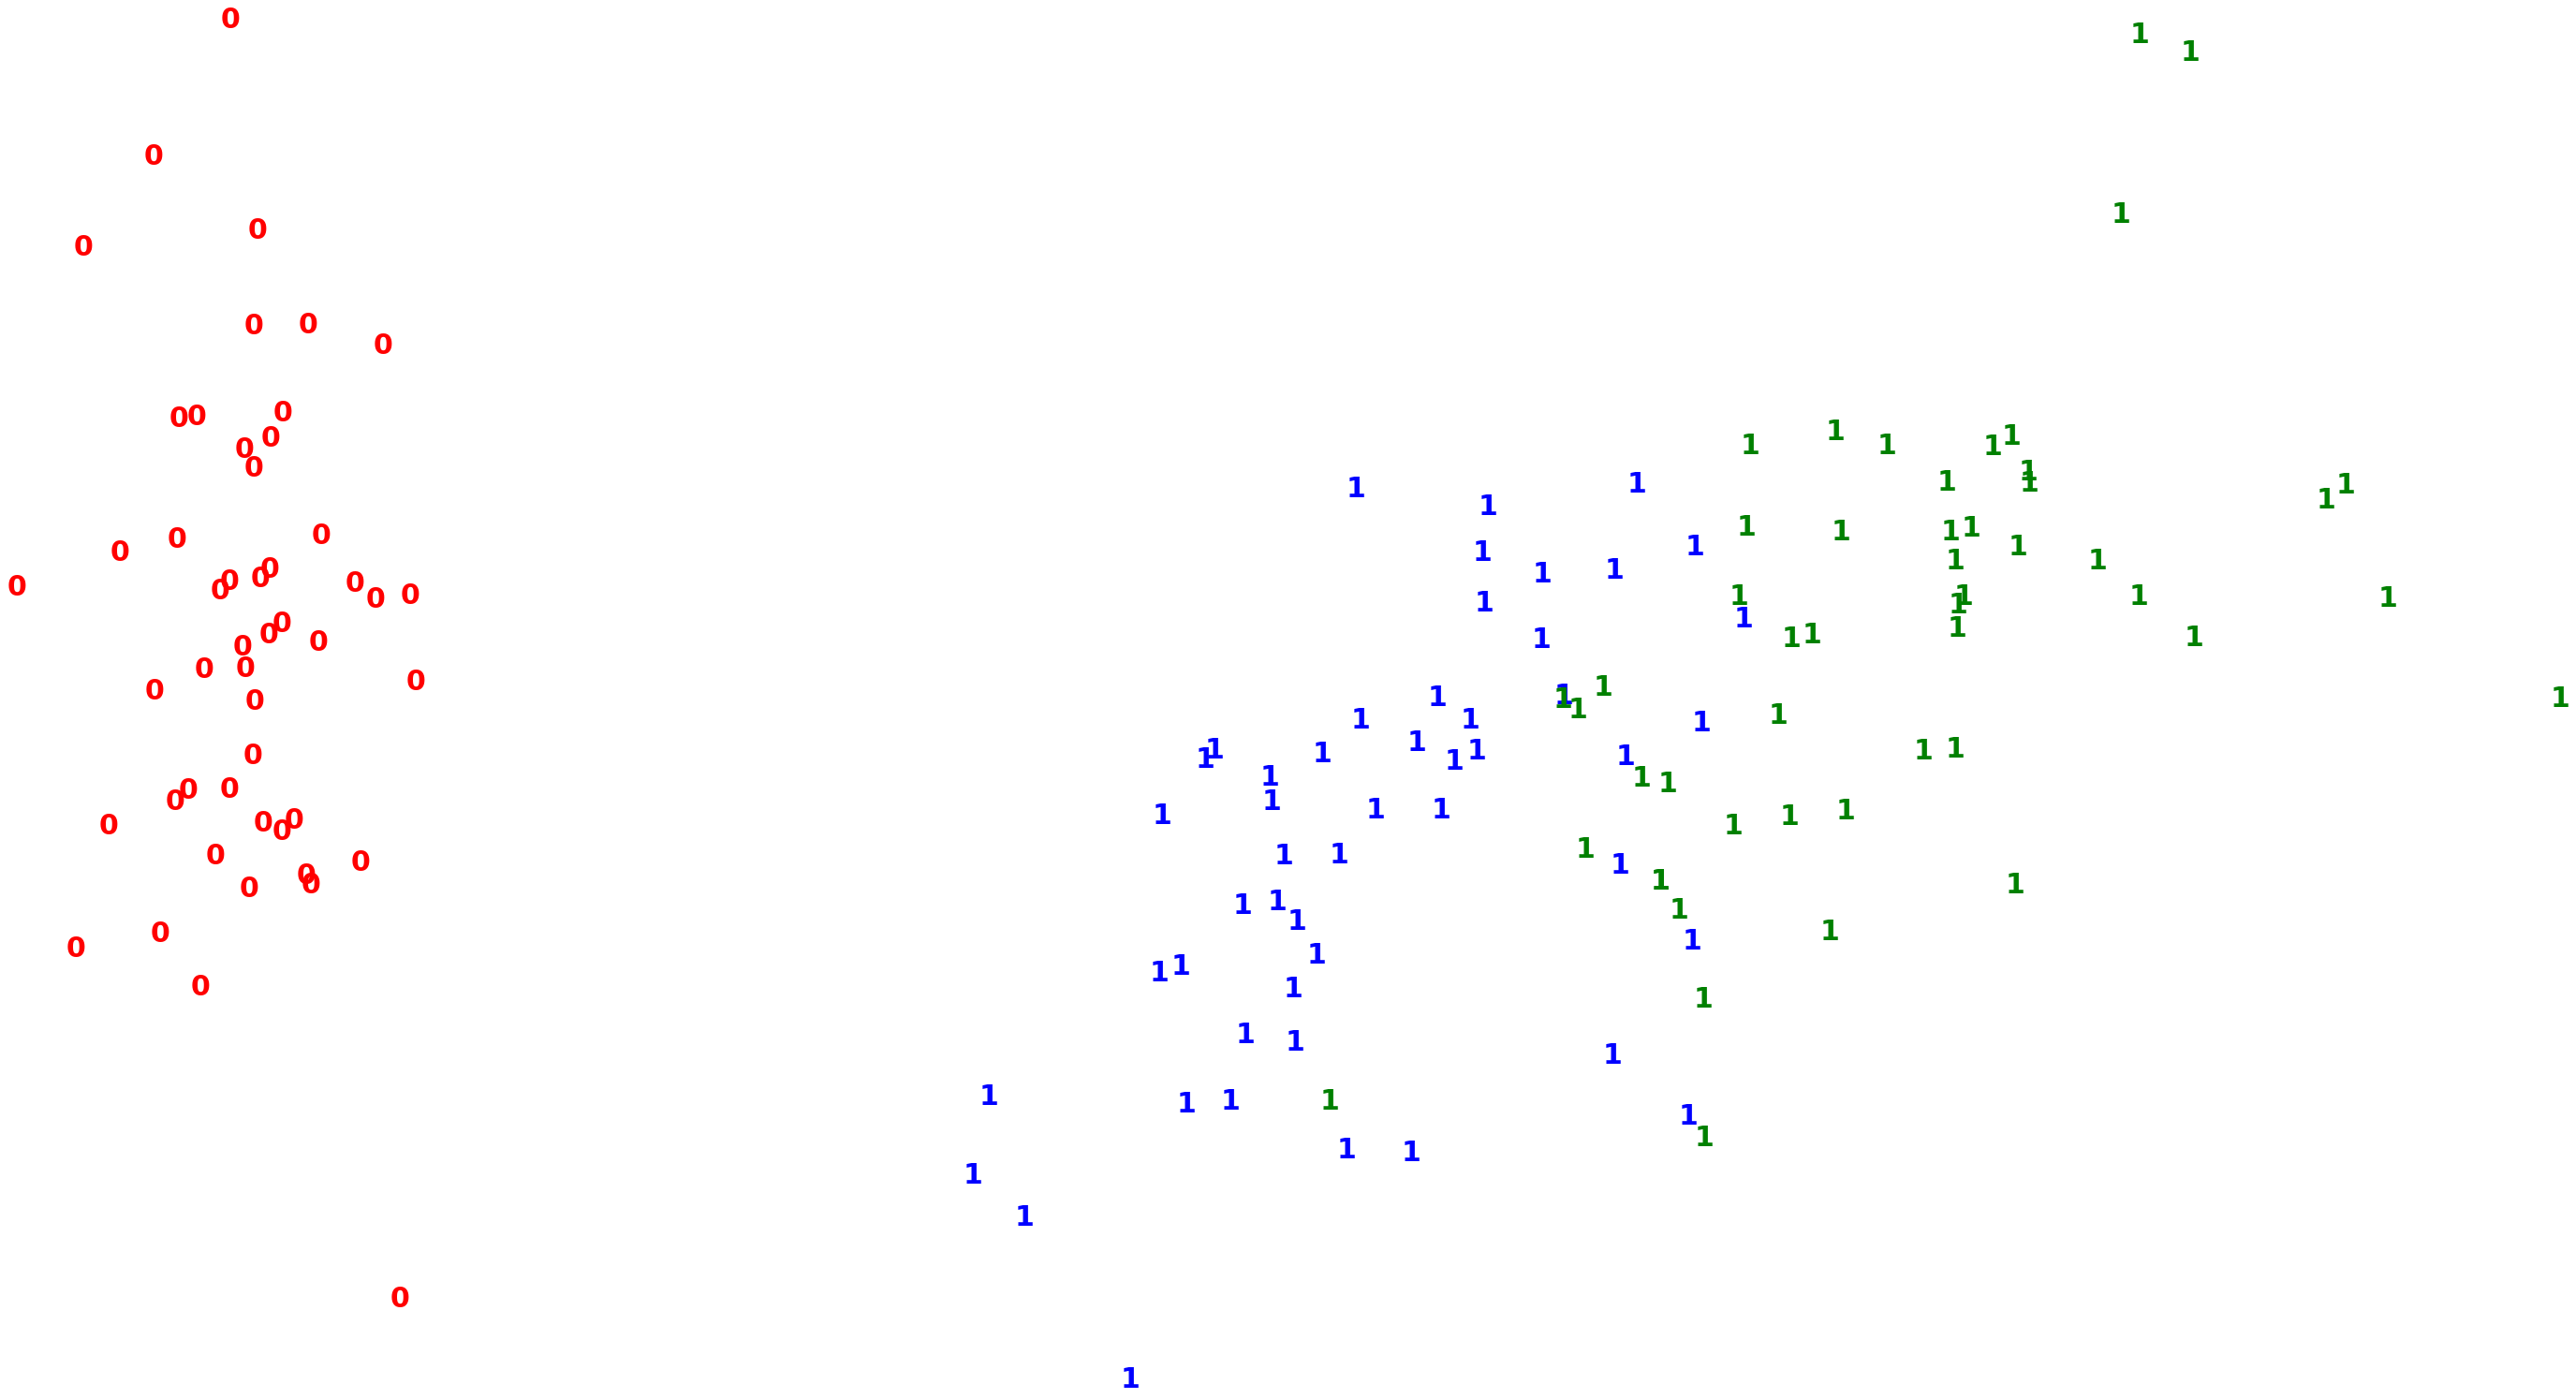

In [94]:
def kmeans_creator1(cluster_number):
    kmeans_cluster = KMeans(n_clusters=cluster_number, random_state=42)
    # fit the model
    kmeans_cluster.fit(x1_std)
    y1_prediction = kmeans_cluster.predict(x1_std)

    # visualise the output
    plt.figure(figsize=(8, 5))
    colors = "rbg"
    for i in range(pca1.shape[0]):
        plt.text(x=pca1[i, 0], y=pca1[i, 1], s=str(y1_prediction[i]), 
                color=colors[y1[i]], fontdict={"weight":"bold", "size":30})

    plt.xticks([])
    plt.yticks([])
    plt.axis("off")
    plt.show()
    # colors are true values where numbers reflect predictions

# forming KMeans model with 2 clusters
kmeans_creator1(2)

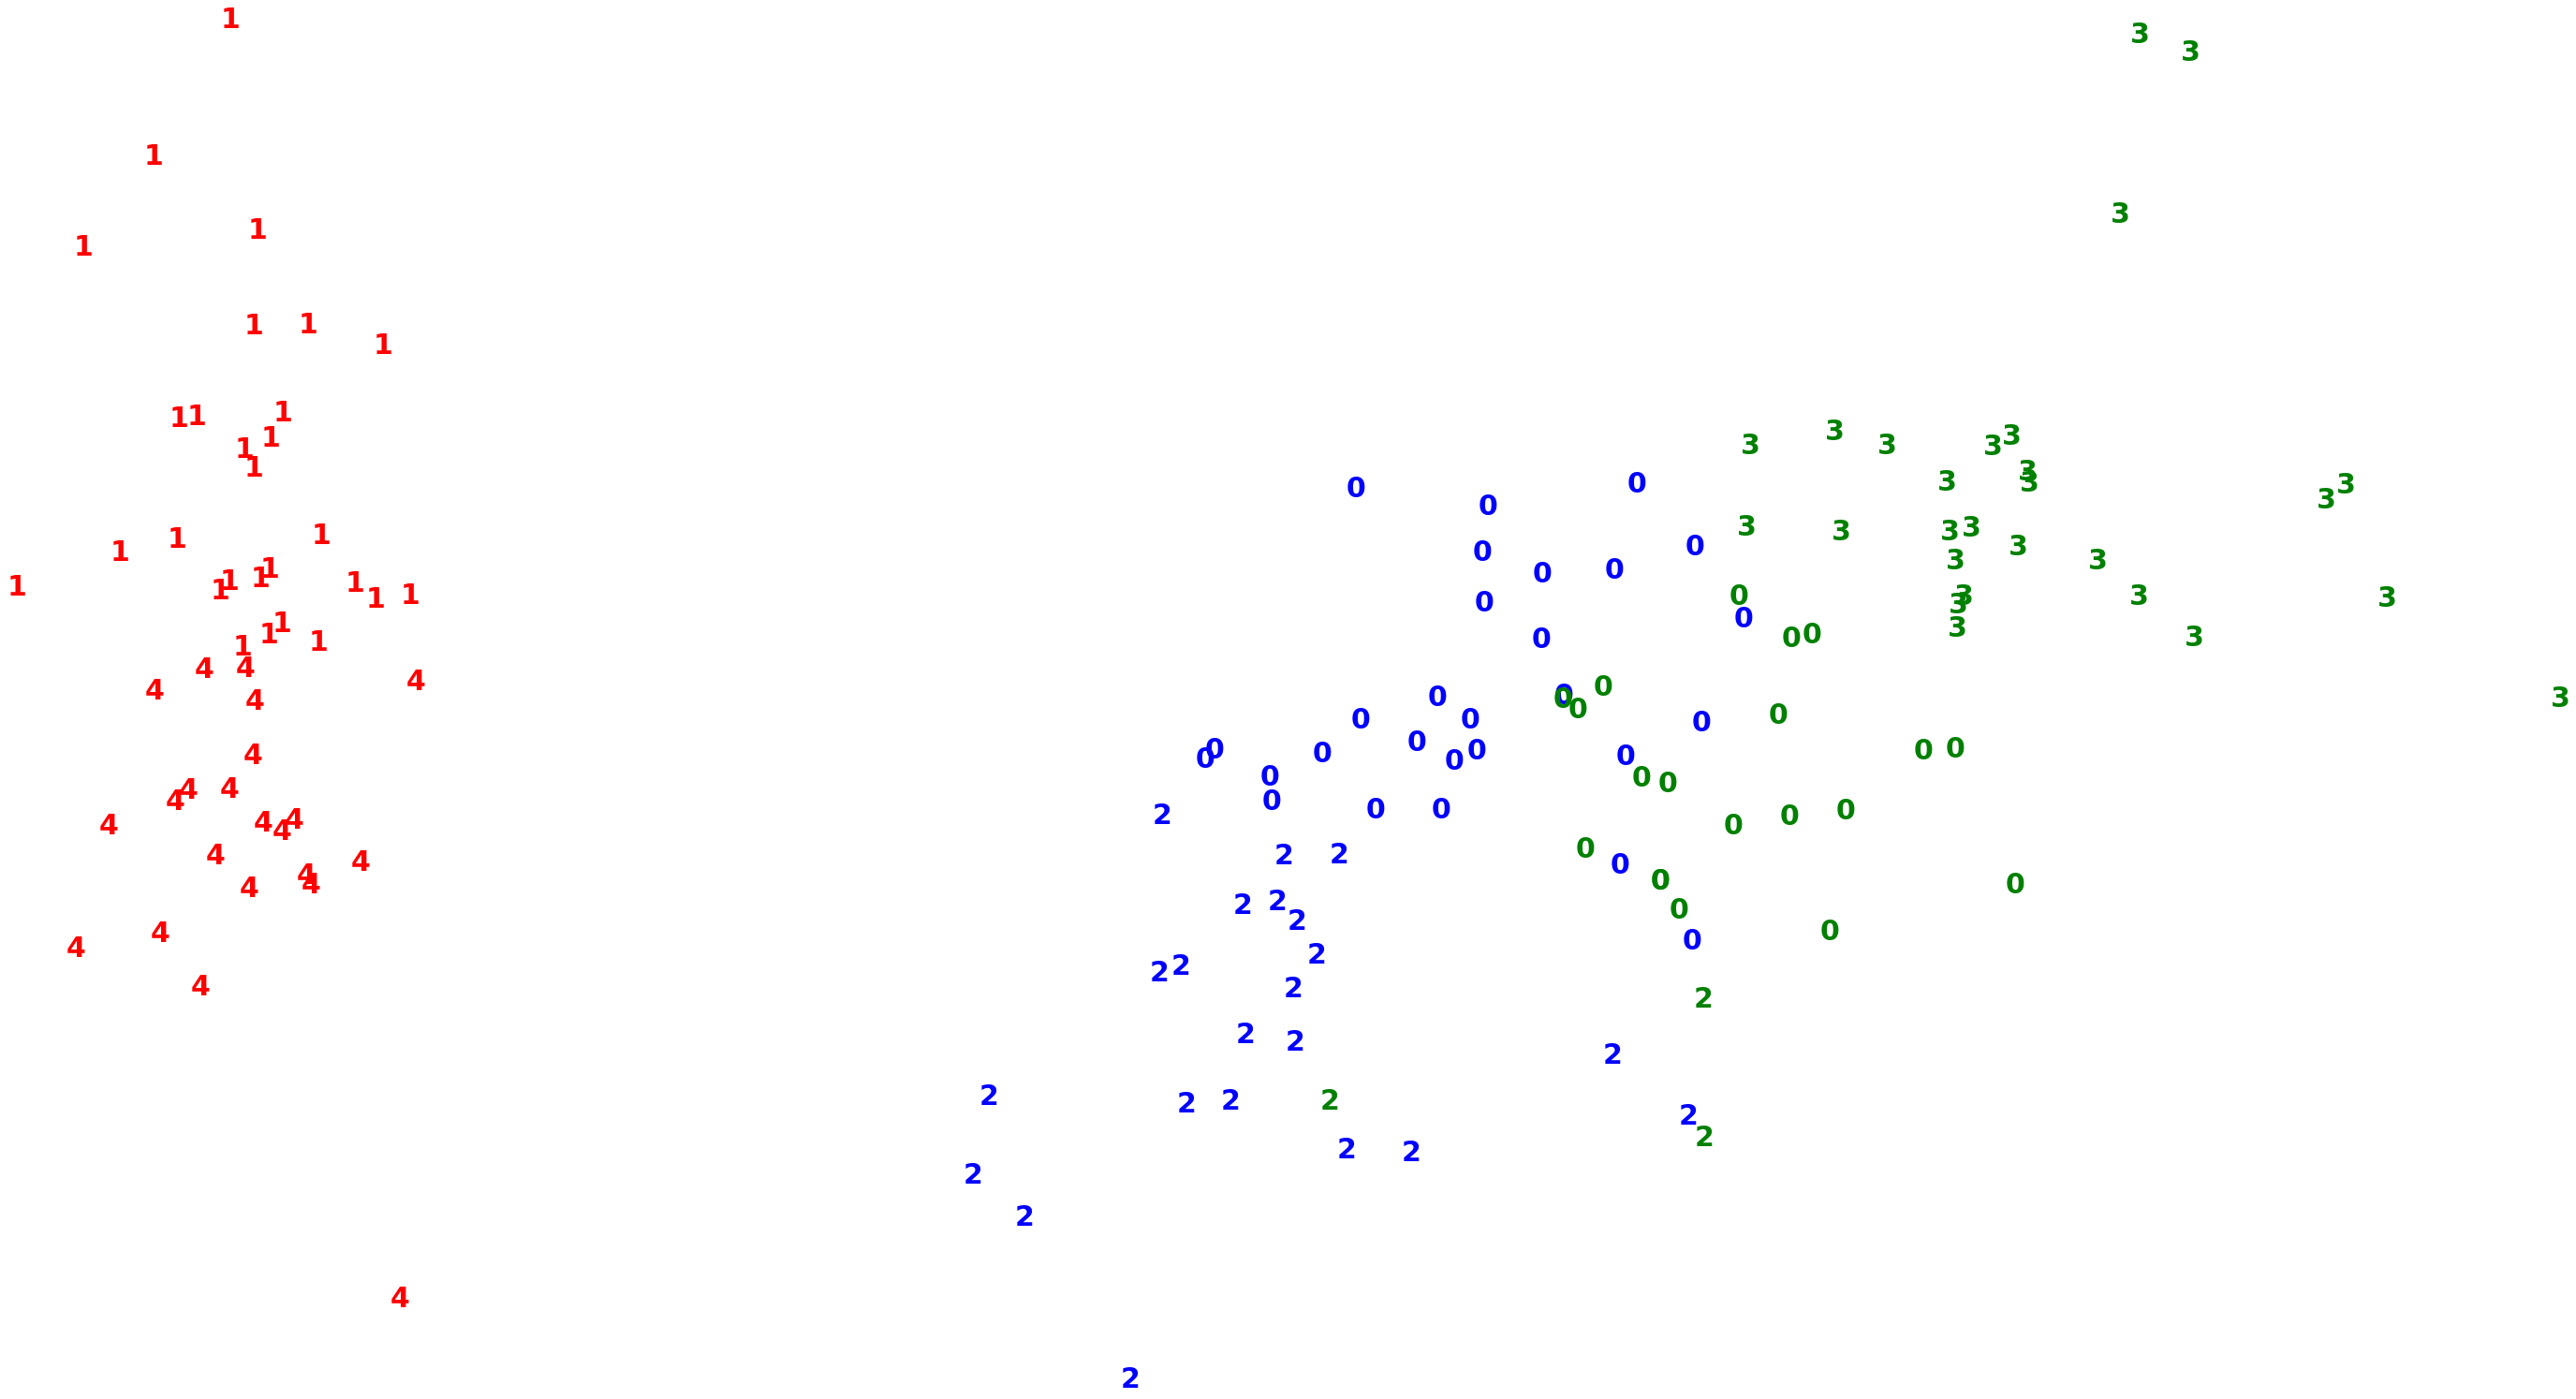

In [95]:
# forming KMeans model with 5 clusters
kmeans_creator1(5)

---
## Soru 2

In [14]:
columns = ["age", "sex", "cp", "restbp", "chol", "fbs", "restecg", 
           "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]

heart_disease = pd.read_csv("/content/drive/My Drive/MertColab/odevler/Cleveland.data", sep=",", names=columns)
del columns

In [35]:
heart_disease.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [30]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    float64
 1   sex      303 non-null    float64
 2   cp       303 non-null    float64
 3   restbp   303 non-null    float64
 4   chol     303 non-null    float64
 5   fbs      303 non-null    float64
 6   restecg  303 non-null    float64
 7   thalach  303 non-null    float64
 8   exang    303 non-null    float64
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    float64
 11  ca       303 non-null    object 
 12  thal     303 non-null    object 
 13  num      303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [ ]:
X_2 = heart_disease.iloc[:, :13]
Y_2 = heart_disease.iloc[:, 13]

X_2 = X_2.replace(to_replace="?", value=0)
X_2 = X_2.astype("float64")
Y_2 = np.where(Y_2>0, 1, 0)

In [ ]:
"""def""" kmeans_creator2(cluster_number):
    kmeans_cluster = KMeans(n_clusters=cluster_number, random_state=42)
    # fit the model
    kmeans_cluster.fit(x1_std)
    y1_prediction = kmeans_cluster.predict(x1_std)

    # visualise the output
    plt.figure(figsize=(8, 5))
    colors = "rbg"
    for i in range(pca1.shape[0]):
        plt.text(x=pca1[i, 0], y=pca1[i, 1], s=str(y1_prediction[i]), 
                color=colors[y1[i]], fontdict={"weight":"bold", "size":30})

    plt.xticks([])
    plt.yticks([])
    plt.axis("off")
    plt.show()
    # colors are true values where numbers reflect predictions

# forming KMeans model with 2 clusters
kmeans_creator2(2)